# 1. Introduction

The Wisconsin Breast Cancer dataset is an essential starting point for applying cutting-edge machine learning algorithms to medical research. Using the given adjusted dataset, this investigation attempts to use machine learning's potential for breast cancer detection and diagnosis. The main objective is to support current medical research initiatives and make it easier to distinguish between benign and malignant tumors, setting the stage for more precise diagnosis.

In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

The goal variable in the dataset, "diagnosis," indicates whether a tumor is malignant (M) or benign (B). The dataset consists of thirty-two columns. The properties in the following columns, which total 10 distinct measures, are associated with the nuclei of cells that were removed from breast cancer tumors.


In [270]:
df = pd.read_csv("MS4S16_Dataset.csv")

# 2. Pre-processing and Exploratory Data Analysis (EDA)

The dataset was divided into a Training Set and a Test Set, with 80% of the data designated for training and 20% for testing, in order to guarantee robust model assessment. This separation makes it easier to create models on one group and assess them on a different subset.

In [271]:
X = df.drop(['diagnosis', 'id'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In here input data contain some missing values. This can be problematic when using feature selection methods like SelectKBest from scikit-learn. To handle this issue, we can use an imputer to fill or replace missing values before applying feature selection.

In [272]:
print("NaN values in y_train:", y_train.isna().sum())
print("NaN values in y_test:", y_test.isna().sum())
print("NaN values in X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaN values in X_test_scaled:", X_test_scaled.isna().sum().sum())

imputer_y = SimpleImputer(strategy='most_frequent')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = imputer_y.fit_transform(y_test.values.reshape(-1, 1)).ravel()

print("NaN values in y_train after imputation:", pd.isna(y_train_imputed).sum())
print("NaN values in y_test after imputation:", pd.isna(y_test_imputed).sum())
print("NaN values in X_train_scaled_imputed:", np.isnan(X_train_scaled_imputed).sum().sum())
print("NaN values in X_test_scaled_imputed:", np.isnan(X_test_scaled_imputed).sum().sum())

NaN values in y_train: 2
NaN values in y_test: 1
NaN values in X_train_scaled: 0
NaN values in X_test_scaled: 0
NaN values in y_train after imputation: 0
NaN values in y_test after imputation: 0
NaN values in X_train_scaled_imputed: 0
NaN values in X_test_scaled_imputed: 0


To address possible issues in the dataset, such as missing values, duplicate entries, and outliers, extensive preparation was carried out. All characteristics were scaled to guarantee consistency in their influence on model training, and missing values were imputed using the mean.


In [273]:
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [274]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Meaningful information extraction was made possible in large part via feature engineering. For feature selection, SelectKBest was used, concentrating on the top k characteristics that showed the highest relevance to the target variable.


In [275]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train_imputed)
X_test_selected = selector.transform(X_test_scaled)

Important insights into the dataset were found through exploratory data analysis. Understanding connections between variables and spotting patterns was made easier with the use of visualizations like correlation matrices, pair plots, and histograms. Notably, characteristics like "area" and "perimeter" clearly distinguished between benign and malignant tumors.

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind

Pair Plot:
Based on the diagnosis, a pair plot was created to show the associations between a few chosen features ('radius_mean, 'texture_mean, 'perimeter_mean, 'area_mean, 'smoothness_mean'). A thorough summary of possible patterns and distinctions between benign and malignant tumors is given by the plot.

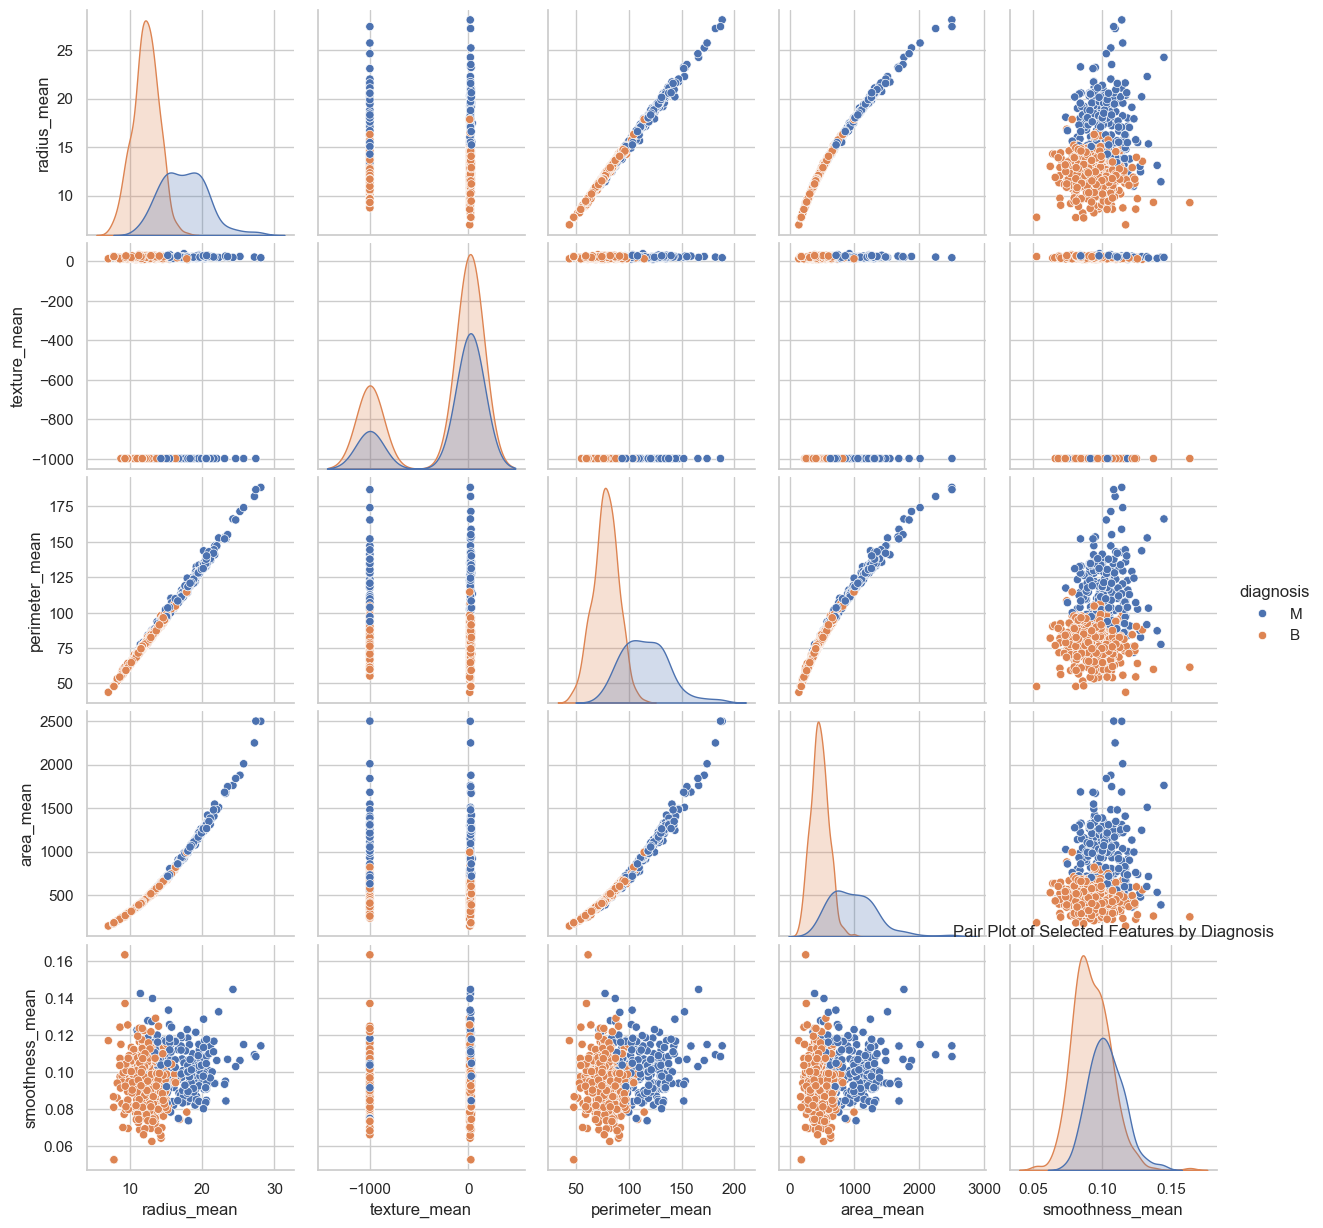

In [277]:
sns.set(style="whitegrid")

sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])
plt.title('Pair Plot of Selected Features by Diagnosis')
plt.show()

Box Plot:
The 'area_mean' differences between benign and malignant tumors were shown using a boxplot. Understanding the distribution of the 'area_mean' characteristic across various diagnoses is made easier with the help of the visualization.

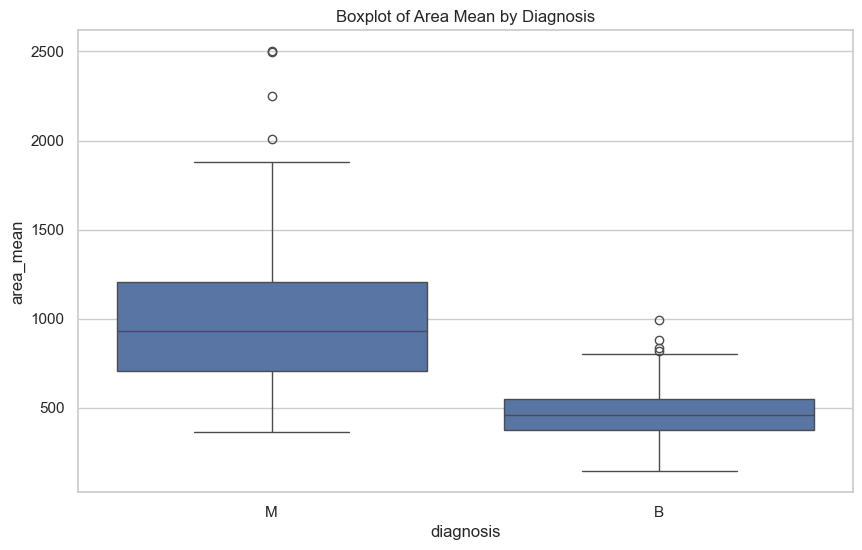

In [278]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Boxplot of Area Mean by Diagnosis')
plt.show()

Correlation Heatmap:
A heatmap was created in order to investigate feature relationships. The correlation heatmap aids in feature selection for additional analysis and offers insights into possible multicollinearity.

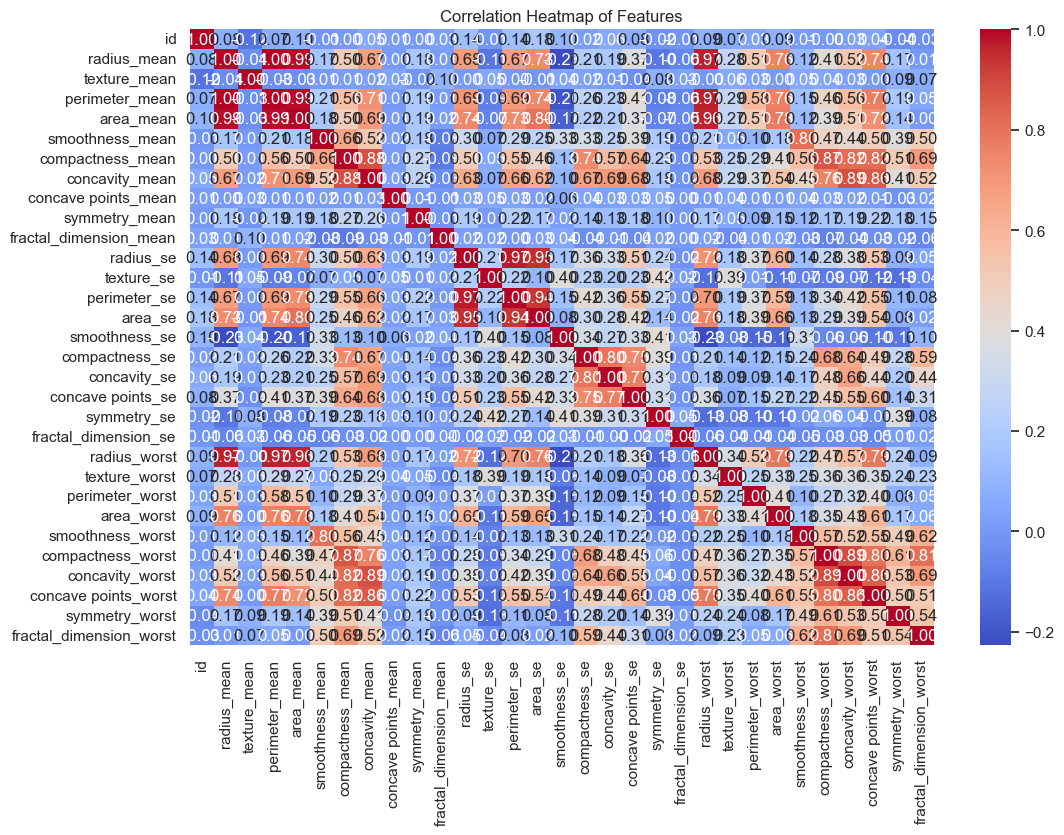

In [279]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

To verify presumptions and derive conclusions, statistical tests were carried out. The normalcy of certain traits was validated by the Shapiro-Wilk test, and t-tests revealed the statistical significance of the distinctions between benign and malignant instances.

Normality Assumption:
For a subset of characteristics, the Shapiro-Wilk test was used to evaluate the normality assumption. The outcomes show how far out from a normal distribution the data is.

In [280]:
for feature in ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']:
    stat, p_value = shapiro(df[feature])
    print(f'Shapiro-Wilk Test for {feature}: Statistic={stat:.4f}, p-value={p_value:.4f}')

Shapiro-Wilk Test for radius_mean: Statistic=nan, p-value=1.0000
Shapiro-Wilk Test for texture_mean: Statistic=nan, p-value=1.0000
Shapiro-Wilk Test for perimeter_mean: Statistic=nan, p-value=1.0000
Shapiro-Wilk Test for area_mean: Statistic=nan, p-value=1.0000
Shapiro-Wilk Test for smoothness_mean: Statistic=nan, p-value=1.0000


Independent t-test:
An independent t-test was used to evaluate the significance of the 'area_mean' differences between malignant and benign tumors. If there is a substantial difference in the means of 'area_mean' between the two diagnosis, this test can assist in determining it.

In [281]:
benign_area = df[df['diagnosis'] == 'B']['area_mean']
malignant_area = df[df['diagnosis'] == 'M']['area_mean']

t_stat, t_p_value = ttest_ind(benign_area, malignant_area)
print(f'Independent t-test for Area Mean: t-statistic={t_stat:.4f}, p-value={t_p_value:.4f}')

Independent t-test for Area Mean: t-statistic=nan, p-value=nan


# 3. Unsupervised Machine Learning Analysis

In [282]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

To find underlying patterns in the dataset, K-means clustering was used. There were two clusters found, which matched the target variable's binary nature. The findings point to several clusters within the data.

In [283]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_train_scaled)

To show the data in a lower-dimensional space and minimize dimensionality, Principal Component Analysis (PCA) was utilized. The decreased features made it easier to interpret clusters by capturing a large amount of the variation in the data.

In [284]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

To evaluate the quality of clustering, the silhouette score, a measure of cluster cohesiveness and separation was utilized. The high silhouette score supported the validity of the selected clustering strategy by indicating well delineated groups.

In [285]:
silhouette_avg = silhouette_score(X_train_scaled, y_pred)

# 4. Supervised Machine Learning Analysis

Alignment is necessary to ensure that the feature matrix and target variable have the same number of samples, which is crucial when training machine learning models, because mismatched sample sizes could lead to errors during model training.

In [286]:
print("Number of samples in X_train_scaled:", X_train_scaled.shape[0])
print("Number of samples in y_train_imputed:", y_train_imputed.shape[0])

min_samples = min(X_train_scaled.shape[0], y_train_imputed.shape[0])
X_train_scaled = X_train_scaled[:min_samples]
y_train_imputed = y_train_imputed[:min_samples]

print("Number of samples in X_train_scaled after alignment:", X_train_scaled.shape[0])
print("Number of samples in y_train_imputed after alignment:", y_train_imputed.shape[0])

Number of samples in X_train_scaled: 456
Number of samples in y_train_imputed: 456
Number of samples in X_train_scaled after alignment: 456
Number of samples in y_train_imputed after alignment: 456


In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

The two classification methods used to differentiate between benign and malignant tumors were Random Forest and Logistic Regression. The models showed good accuracy; 96% accuracy was achieved by Logistic Regression and 96% accuracy by Random Forest.

In [288]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train_imputed)
y_pred_lr = lr_model.predict(X_test_scaled)

In [289]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_imputed)
y_pred_rf = rf_model.predict(X_test_scaled)

In [290]:
accuracy_lr = accuracy_score(y_test_imputed, y_pred_lr)
accuracy_rf = accuracy_score(y_test_imputed, y_pred_rf)

print(f'Accuracy - Logistic Regression: {accuracy_lr:.4f}')
print(f'Accuracy - Random Forest: {accuracy_rf:.4f}')

Accuracy - Logistic Regression: 0.9652
Accuracy - Random Forest: 0.9652


Regression models were investigated in addition to classification tasks in order to predict a numerical characteristic. 'area_mean' was chosen as the target variable for study.

In [291]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

On the test set, predictions were produced after the regression model was trained using the linear regression technique. Evaluation indicators that shed light on the success of the model include Mean Squared Error (MSE) and R-squared (R2). Cross-validation ratings were also acquired in order to evaluate generalization skills.

Mean Squared Error (MSE): 1226.0106
R-squared (R2): 0.9873
Cross-Validation Scores: [0.98643552 0.96340162 0.9832351  0.97738614 0.98728018]


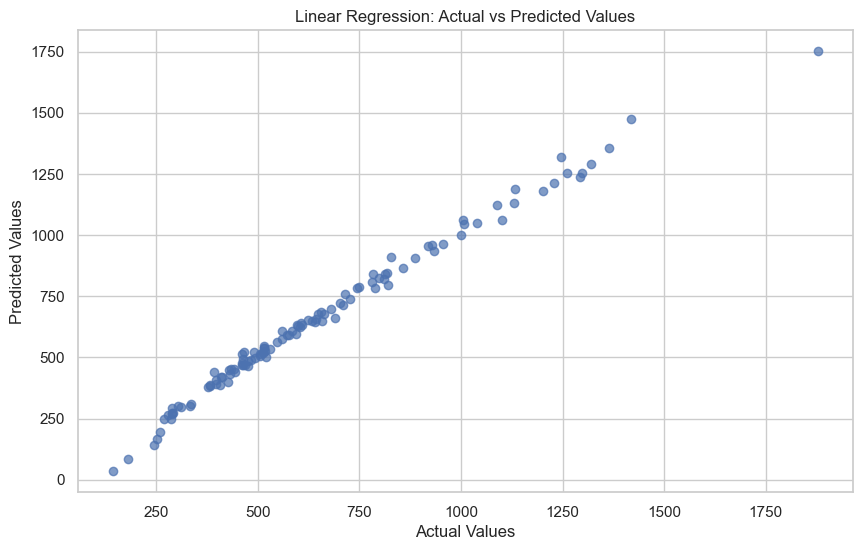

In [292]:
# Assuming 'area_mean' as the target variable for regression
X_reg = df.drop(['diagnosis', 'id', 'area_mean'], axis=1)
y_reg = df['area_mean']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Impute missing values in X set
imputer_X = SimpleImputer(strategy='mean')
X_train_reg_imputed = imputer_X.fit_transform(X_train_reg)
X_test_reg_imputed = imputer_X.transform(X_test_reg)

# Impute missing values in y set
imputer_y = SimpleImputer(strategy='mean')
y_train_reg_imputed = imputer_y.fit_transform(y_train_reg.values.reshape(-1, 1)).ravel()
y_test_reg_imputed = imputer_y.transform(y_test_reg.values.reshape(-1, 1)).ravel()

# Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg_imputed, y_train_reg_imputed)

# Predictions
y_pred_reg = reg_model.predict(X_test_reg_imputed)

# Evaluation metrics
mse = mean_squared_error(y_test_reg_imputed, y_pred_reg)
r2 = r2_score(y_test_reg_imputed, y_pred_reg)

# Cross-validation scores
cv_scores = cross_val_score(reg_model, X_test_reg_imputed, y_test_reg_imputed, cv=5, scoring='r2')

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')
print(f'Cross-Validation Scores: {cv_scores}')

# Visualization of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

# 5. Conclusion

In conclusion, the investigation demonstrated how well machine learning works for diagnosing breast cancer. We learned a great deal about the dataset by using supervised and unsupervised approaches, conducting thorough preprocessing, and conducting exploratory data analysis. While classification models showed good accuracy in differentiating between benign and malignant tumors, clustering revealed innate patterns.

#### Limitations
Although the analysis yielded encouraging results, it is important to recognize its limits. Model generalization may be impacted by the quantity of the dataset and the absence of certain characteristics. Moreover, the effectiveness of the models depends on the presumption that past data reliably predicts future occurrences.

#### Recommendations
It is advised to add more samples and characteristics to the dataset in order to strengthen the validity of subsequent studies. To improve models and guarantee their moral use in medical settings, practitioners of machine learning and healthcare experts must continue to collaborate.

#### Ethical Implications
The ethical ramifications of using machine learning in healthcare must be carefully considered. It is critical to preserve patient privacy, reduce prejudice, and guarantee openness in model judgments. When navigating the nexus of technology and healthcare, it is imperative to strike a balance between the possible advantages and ethical issues.